# Problem 4


In [1]:
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## First graph (cube)

In [2]:
cube = nx.generators.lattice.hypercube_graph(3)
n_nodes = cube.number_of_nodes()
n_edges = cube.number_of_edges()

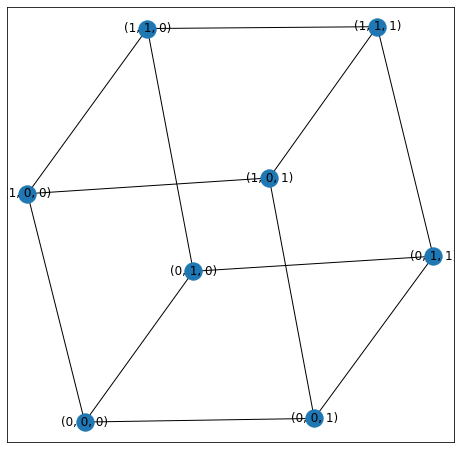

In [5]:
fig = plt.figure(figsize=(8,8))
nx.draw_networkx(cube)

In [6]:
indices = dict()
for i in range(n_nodes):
    indices[list(cube.nodes)[i]] = i
print(indices)

{(0, 0, 0): 0, (0, 0, 1): 1, (0, 1, 0): 2, (0, 1, 1): 3, (1, 0, 0): 4, (1, 0, 1): 5, (1, 1, 0): 6, (1, 1, 1): 7}


In [7]:
# Number of iterations
n_iter = 50

# Save the final opinion and avererage
# of final opinions in two dictionaries
# where the key is the position (i,j,k) 
# of the second stubborn aggent
final_opinions = dict()
average_opinion = dict()


for (i,j,k) in cube.nodes:
    # Position (0,0,0) is occupied by the 0-stubborn node
    if (i,j,k)==(0,0,0):
        continue
        
    # Stubborn and regular nodes
    stubborn = [(0,0,0), (i,j,k)];
    # Get the ids of the stubborn nodes
    stubborn_id = [indices.get(key) for key in stubborn]
    regular = [node for node in cube.nodes if node not in stubborn]
    # Get the ids of the regular nodes
    regular_id = [id for id in range(n_nodes) if id not in stubborn_id]
    print("Stubborn nodes:", stubborn)

    # Input to stubborn nodes 
    u = [0,1]


    # P matrix
    W = nx.adjacency_matrix(cube)
    # convert A to a numpy array
    W = W.toarray()
    degrees = np.sum(W,axis=1)
    D = np.diag(degrees)
    P = np.linalg.inv(D) @ W

    # Compute submatrices
    Q = P[np.ix_(regular_id, regular_id)]
    E = P[np.ix_(regular_id, stubborn_id)]

    # Sample a random initial condition for regular nodes
    ic = np.random.uniform(0,1,len(regular))

    # Set the initial condition for the dynamics
    x = np.zeros((n_nodes,n_iter))
    x[stubborn_id,0] = u;
    x[regular_id,0] = ic;

    # Evolve the dynamics
    for t in range(1,n_iter):
        x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1]
        x[stubborn_id, t] = x[stubborn_id, t-1];

    final_opinions[(i,j,k)] = x[:,n_iter-1]
    average_opinion[(i,j,k)] = np.average(final_opinions[(i,j,k)])
    print("Average opinion:", average_opinion[(i,j,k)])



Stubborn nodes: [(0, 0, 0), (0, 0, 1)]
Average opinion: 0.5000045571992782
Stubborn nodes: [(0, 0, 0), (0, 1, 0)]
Average opinion: 0.49999877209668303
Stubborn nodes: [(0, 0, 0), (0, 1, 1)]
Average opinion: 0.500000007286262
Stubborn nodes: [(0, 0, 0), (1, 0, 0)]
Average opinion: 0.4999990448314581
Stubborn nodes: [(0, 0, 0), (1, 0, 1)]
Average opinion: 0.5000000098598725
Stubborn nodes: [(0, 0, 0), (1, 1, 0)]
Average opinion: 0.500000022986302
Stubborn nodes: [(0, 0, 0), (1, 1, 1)]
Average opinion: 0.49999999964735353


#### We can notice that the average opinions are almost equal with the different configurations for the second stubborn node. In this sense, every node could be set as the second stubborn node because of the symmetry of the 3D-cube. In the following figure the size and color of the nodes reflect their magnitude of the average asymptotic opinion. It confirms that all nodes are in an optimal placement to be stubborn nodes.

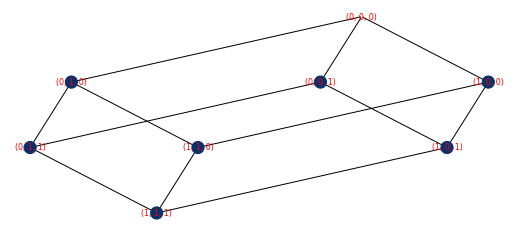

In [8]:
# add a dummy (0,0,0) entry to the dictionary
# to make its size = n_nodes
# just foor the plot because we already have a stubborn in (0,0,0)
# so we can't put it in (0,0,0)
average_opinion[(0,0,0)] = 0

plt.figure(1, figsize=(7,3))
nx.draw(cube, 
        pos = nx.spectral_layout(cube),
        with_labels=True,
        # exponenitial dependece because the sizes are similar
        # difficult to spot the difference with linear relationship
        node_size = [np.exp(10*average_opinion[node]) for node in cube.nodes],
        node_color= [average_opinion[node] for node in cube.nodes],
        font_size=8,
        font_color='red',
        # node's colors are on the blue scale
        cmap=plt.cm.Blues)

In [9]:
# convert the average opinion values from dict_values to numpy array
avg = np.fromiter(average_opinion.values(),dtype=float)

optimal_place = [place for place in average_opinion.keys() if average_opinion[place]==np.max(avg)]
# we can have more than 1 place with this method
print("Optimal placements:", optimal_place)

Optimal placements: [(0, 0, 1)]


## Second graph 

In [10]:
G = nx.generators.lattice.hexagonal_lattice_graph(1,1)

new_labels = dict()

for i, node in enumerate(G.nodes):
  new_labels[node] = i
  #print(node)

# Do this so we can have simple number, not tuples like (0,1)...
G = nx.relabel_nodes(G, new_labels)

G.add_edge(1, 6)
G.add_edge(6, 7)

G.add_edge(2, 8)

G.add_edge(3, 9)
G.add_edge(9, 10)

G.add_edge(4, 11)

G.add_edge(5,12)
G.add_edge(12, 13)

n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()

print(f"Number of nodes: {n_nodes}")
print(f"Number of edges: {n_edges}")


Number of nodes: 14
Number of edges: 14


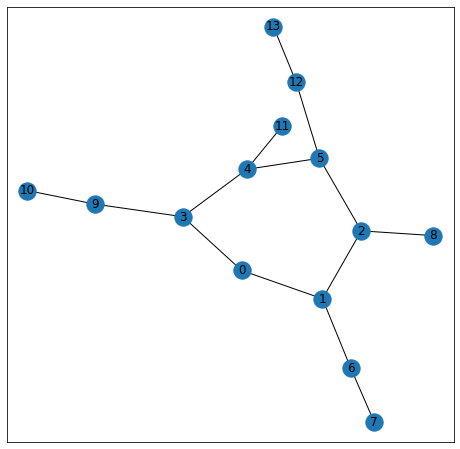

In [11]:
fig = plt.figure(figsize=(8,8))
nx.draw_networkx(G)

In [12]:
# Number of iterations
n_iter = 50

final_opinions = dict()
average_opinion = dict()


for (i) in G.nodes:
    # Position (0) is occupied by the 0-stubborn node
    if (i)==(0):
        continue
        
    # Stubborn and regular nodes
    stubborn = [0, i];
    stubborn_id = stubborn
    regular = [node for node in G.nodes if node not in stubborn]
    regular_id = regular
    print("Stubborn nodes:", stubborn)

    # Input to stubborn nodes
    u = [0,1]


    # P matrix
    W = nx.adjacency_matrix(G)
    # convert A to a numpy array
    W = W.toarray()
    degrees = np.sum(W,axis=1)
    D = np.diag(degrees)
    P = np.linalg.inv(D) @ W

    # Submatrices
    Q = P[np.ix_(regular_id, regular_id)]
    E = P[np.ix_(regular_id, stubborn_id)]

    # Initialize
    ic = np.random.uniform(0,1,len(regular))

    x = np.zeros((n_nodes,n_iter))
    x[stubborn_id,0] = u;
    x[regular_id,0] = ic;

    for t in range(1,n_iter):
        x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1]
        x[stubborn_id, t] = x[stubborn_id, t-1];

    final_opinions[(i)] = x[:, n_iter-1]
    average_opinion[(i)] = np.average(final_opinions[(i)])
    print("Average opinion:", average_opinion[(i)])



Stubborn nodes: [0, 1]
Average opinion: 0.5550693290138212
Stubborn nodes: [0, 2]
Average opinion: 0.5358222594877383
Stubborn nodes: [0, 3]
Average opinion: 0.5573888183554
Stubborn nodes: [0, 4]
Average opinion: 0.5351259884168524
Stubborn nodes: [0, 5]
Average opinion: 0.5476423376944263
Stubborn nodes: [0, 6]
Average opinion: 0.3462534498321666
Stubborn nodes: [0, 7]
Average opinion: 0.2553547877162848
Stubborn nodes: [0, 8]
Average opinion: 0.33678670186084975
Stubborn nodes: [0, 9]
Average opinion: 0.3414516902545644
Stubborn nodes: [0, 10]
Average opinion: 0.25065864848755376
Stubborn nodes: [0, 11]
Average opinion: 0.3387564050589017
Stubborn nodes: [0, 12]
Average opinion: 0.3863504452677845
Stubborn nodes: [0, 13]
Average opinion: 0.30006615425659133


#### In this case, as we can se from the following figure, not all nodes can be chosen as the optimal second stubborn node since they are not in an optimal placement.

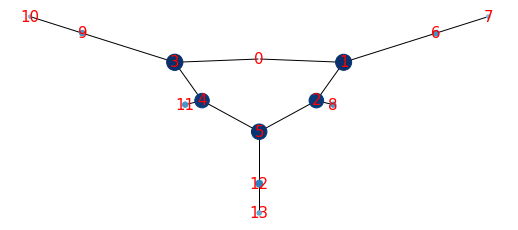

In [13]:
# add a dummy (0) entry to the dictionary
# to make its size = n_nodes
# just foor the plot because we already have a stubborn in (0)
# so we can't put it in (0)
average_opinion[(0)] = 0

plt.figure(1, figsize=(7,3))
nx.draw(G, 
        pos = nx.spectral_layout(G),
        with_labels=True,
        # exponenitial dependece because the sizes are similar
        # difficult to spot the difference with linear relationship
        node_size = [np.exp(10*average_opinion[node]) for node in G.nodes],
        node_color= [average_opinion[node] for node in G.nodes],
        font_size=15,
        font_color='Red',
        # node's colors are on the blue scale
        cmap=plt.cm.Blues)

In [14]:
# convert the average opinion values from dict_values to numpy array
avg = np.fromiter(average_opinion.values(),dtype=float)

optimal_place = [place for place in average_opinion.keys() if average_opinion[place]==np.max(avg)]
# we can have more than 1 place with this method
print("Optimal placements:", optimal_place)

Optimal placements: [3]
